## VHF Analysis

This notebook will walkthrough plotting and analysis for water models.  The raw data is in TXT format and contains the van hove function for the various water models.  For more information on how to compute the van hove function, please see [MDTraj](https://www.mdtraj.org/1.9.5/index.html) and the [scattering](https://github.com/mattwthompson/scattering) code.

### Importing packages
Start off by importing the analysis module within this package

In [1]:
from water_vhf_analysis.analysis import plot_relaxation
from water_vhf_analysis.analysis import plot_summary
from water_vhf_analysis.analysis import plot_partials
from water_vhf_analysis.utils.utils import get_txt_file, get_csv_file
import numpy as np

### Loading in raw data
The raw data is expected to be loaded in as a Python dictionary with the following keys: "Name", "r", "t", and "g"

In [2]:
# Load in SPC/E data
spce = {
     "r": np.loadtxt(get_txt_file("spce/nvt_total_data", "r_random.txt")),
     "t": np.loadtxt(get_txt_file("spce/nvt_total_data", "t_random.txt")),
     "g": np.loadtxt(get_txt_file("spce/nvt_total_data", "vhf_random.txt")),
     "name": "SPC/E",
 }

# Load in TIP3P_EW data
tip3pew = {
     "r": np.loadtxt(get_txt_file("tip3p_ew/nvt_total_data", "r_random.txt")),
     "t": np.loadtxt(get_txt_file("tip3p_ew/nvt_total_data", "t_random.txt")),
     "g": np.loadtxt(get_txt_file("tip3p_ew/nvt_total_data", "vhf_random.txt")),
     "name": "TIP3P_EW",
 }

# Load in reaxff data
bk3 = {
     "r": np.loadtxt(get_txt_file("bk3/nvt_total_data", "r_random.txt")),
     "t": np.loadtxt(get_txt_file("bk3/nvt_total_data", "t_random.txt")),
     "g": np.loadtxt(get_txt_file("bk3/nvt_total_data", "vhf_random.txt")),
     "name": "BK3",
 }

# Load in DFTB data
dftb = {
     "r": np.loadtxt(get_txt_file("dftb/nvt_total_data", "r_random.txt")),
     "t": np.loadtxt(get_txt_file("dftb/nvt_total_data", "t_random.txt")),
     "g": np.loadtxt(get_txt_file("dftb/nvt_total_data", "vhf_random.txt")),
     "name": "3obw",
 }

# Load in reaxff data
reaxff = {
     "r": np.loadtxt(get_txt_file("reaxff/nvt_total_data", "r_random.txt")),
     "t": np.loadtxt(get_txt_file("reaxff/nvt_total_data", "t_random.txt")),
     "g": np.loadtxt(get_txt_file("reaxff/nvt_total_data", "vhf_random.txt")),
     "name": "CHON-2017_weak",
 }

# Load in aimd data
aimd = {
     "r": np.loadtxt(get_txt_file("aimd/nvt_total_data", "r_random.txt")),
     "t": np.loadtxt(get_txt_file("aimd/nvt_total_data", "t_random.txt")),
     "g": np.loadtxt(get_txt_file("aimd/nvt_total_data", "vhf_random.txt")),
     "name": "optB88",
 }

# Load in aimd data at 300K
aimd_330 = {
     "r": np.loadtxt(get_txt_file("aimd/330k/nvt_total_data", "r_random.txt")),
     "t": np.loadtxt(get_txt_file("aimd/330k/nvt_total_data", "t_random.txt")),
     "g": np.loadtxt(get_txt_file("aimd/330k/nvt_total_data", "vhf_random.txt")),
     "name": "optB88 (330 K)",
 }

# Load in IXS data
# Multiplying r by 0.1 to convert from angstroms to nm
# Adding 1 to g(r,t)-1
ixs = {
     "r": 0.1 * np.loadtxt(get_txt_file("expt", "R_1811pure.txt"))[0],
     "t": np.loadtxt(get_txt_file("expt", "t_1811pure.txt"))[:,0],
     "g": 1 + np.loadtxt(get_txt_file("expt", "VHF_1811pure.txt")),
     "name": "IXS",
 }

data = [ixs, spce, tip3pew, bk3, reaxff, dftb, aimd, aimd_330]

### Plotting Total VHF

A subplot containing $G(r, t)$ as a function of distance and a heatmap of $G(r, t)-1$ can be plotted with the function `plot_total_subplots`.  The first argument is our list of dictionaries containing the raw data, and the `save` argument is set to False since we don't want to save out this figure.

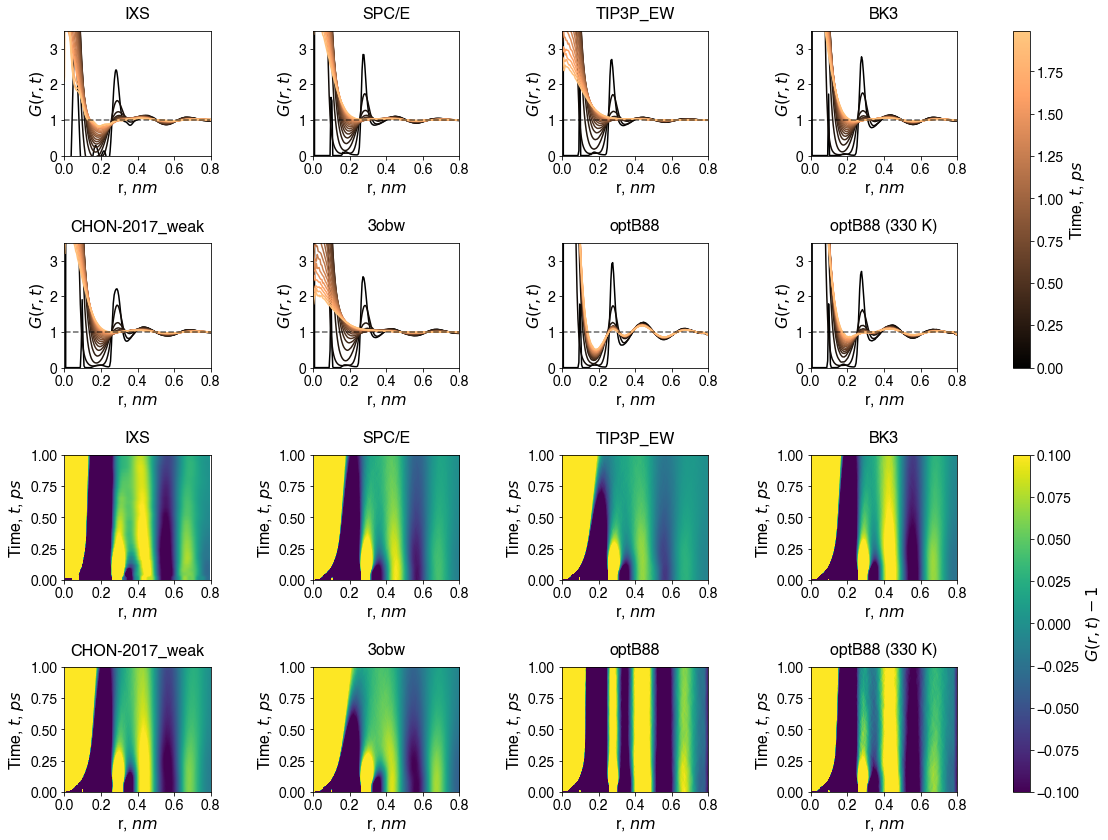

In [3]:
plot_summary.plot_total_subplots(data, save=False)

### Plotting correlations
The functions to plot correlations are contained within `plot_relaxation.py`.  In the paper, the correlations related to the first neighbor peak are analyzed through the magnitude of G(r, t) as well as through the area under the curve, A(t), of the first peak.  This is plotted with the function `plot_first_peak_subplot()`.

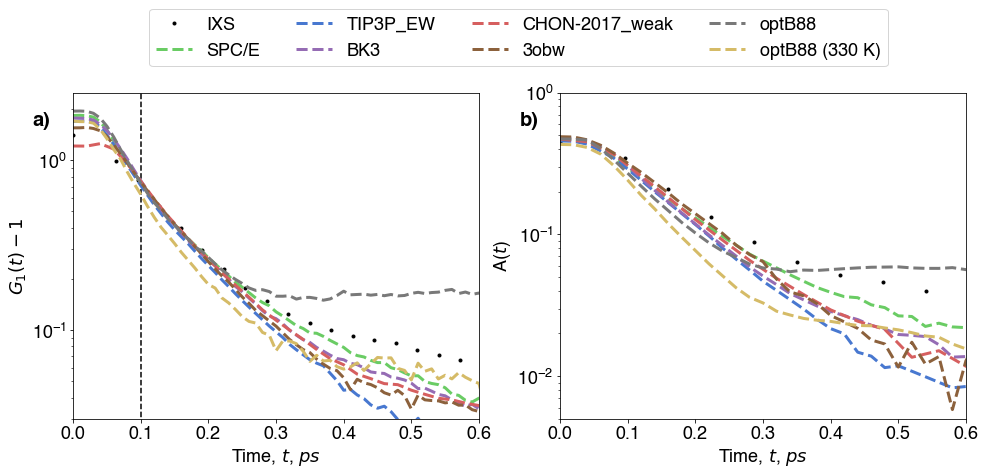

In [4]:
# Plot the correlations for the first peak
plot_relaxation.plot_first_peak_subplot(data, save=False)

A(t) displays a two-step decay.  We can fit this decay to an exponential equation.  We can perform this curve fitting and plot the results for each model.

IXS
tau_1 is: 0.15288715563567773
A_1 is: 0.33004231725361677
gamma_1 is: 2.118983411700794
tau_2 is: 0.47525003875828137
A_2 is: 0.1279475833293484
gamma_2 is: 1.3600701239628241
SPC/E
tau_1 is: 0.13220953090048587
A_1 is: 0.3426882262417296
gamma_1 is: 1.8307158483394284
tau_2 is: 0.34736374850712326
A_2 is: 0.13964680942927718
gamma_2 is: 1.274228764680804
TIP3P_EW
tau_1 is: 0.13080412887250875
A_1 is: 0.3103306465823302
gamma_1 is: 1.914812792883222
tau_2 is: 0.26383973605360705
A_2 is: 0.155089743205378
gamma_2 is: 1.4783906712822923
BK3
tau_1 is: 0.1342678143225253
A_1 is: 0.37819265111878814
gamma_1 is: 1.9457992734543708
tau_2 is: 0.33630632750111816
A_2 is: 0.11409328126573899
gamma_2 is: 1.3338043150865748
CHON-2017_weak
tau_1 is: 0.1379872180973395
A_1 is: 0.34283110995289223
gamma_1 is: 1.9600154826387728
tau_2 is: 0.31430444047228456
A_2 is: 0.13573116569517685
gamma_2 is: 1.4507195735287717
3obw
tau_1 is: 0.15328441628966072
A_1 is: 0.43587868130731416
gamma_1 is: 1.64638

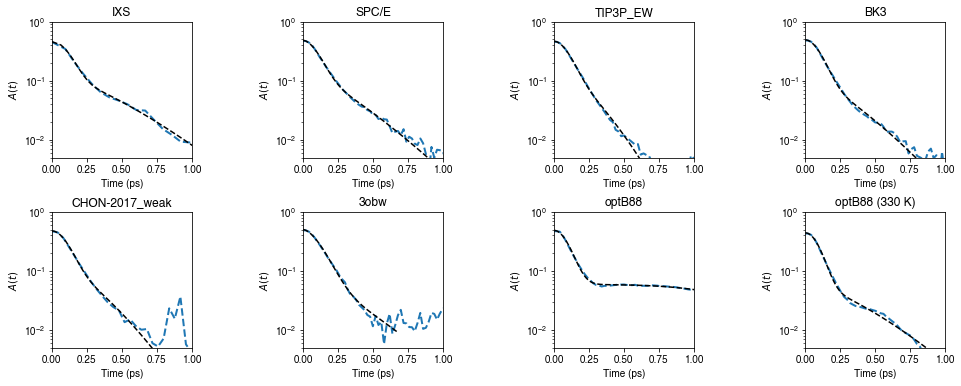

In [5]:
# Plot the fits for A(t)
plot_relaxation.first_peak_auc(data, save=False)

When running this function, the fitting results are saved to a CSV file.  This can be loaded into a Pandas DataFrame to view.

In [6]:
import pandas as pd

df = pd.read_csv(get_csv_file("first_peak_fits.csv"))
df

,Model,$A_{1}$,$\tau_{1}$,$\gamma_{1}$,$A_{2}$,$\tau_{2}$,$\gamma_{2}$
0,IXS,0.330042,0.152887,2.118983,0.127948,0.475250,1.360070
1,SPC/E,0.342688,0.132210,1.830716,0.139647,0.347364,1.274229
2,TIP3P\_EW,0.310331,0.130804,1.914813,0.155090,0.263840,1.478391
3,BK3,0.378193,0.134268,1.945799,0.114093,0.336306,1.333804
4,CHON-2017\_weak,0.342831,0.137987,1.960015,0.135731,0.314304,1.450720
5,3obw,0.435879,0.153284,1.646382,0.066638,0.415207,1.399298
6,optB88,0.427833,0.124840,1.916347,0.058802,1.531700,3.847573
7,optB88 (330 K),0.380280,0.121958,2.022365,0.061608,0.449187,1.401234


The height of the second peak, $G_2(t)$, was also calculated.  Due to different values at $t=0$, these values were also normalized.

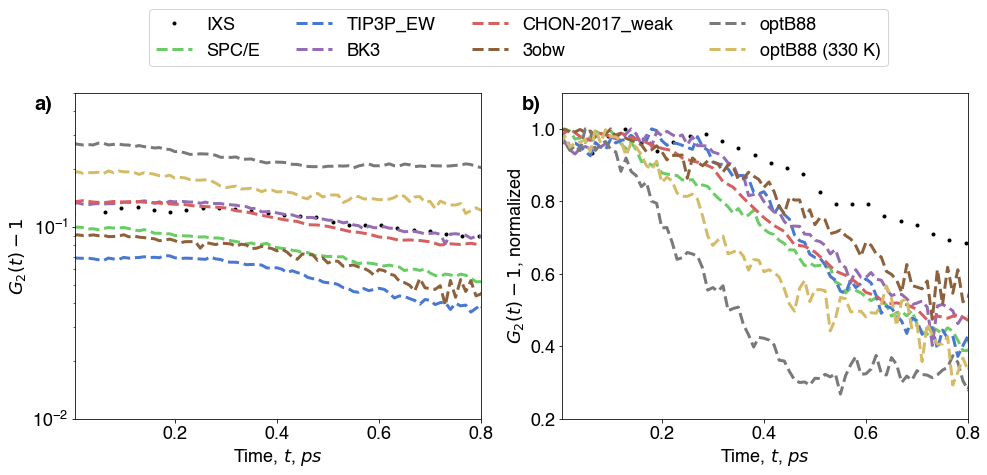

In [7]:
# Plot the correlations for the second peak
plot_relaxation.plot_second_subplot(data, save=False)

### Plot partial Van Hove functions
The van hove functions for the specific pairwise interactions were also computed.  These functions are contained within `plot_partials`.  For these functions, I'm going to use a function to load in the data.

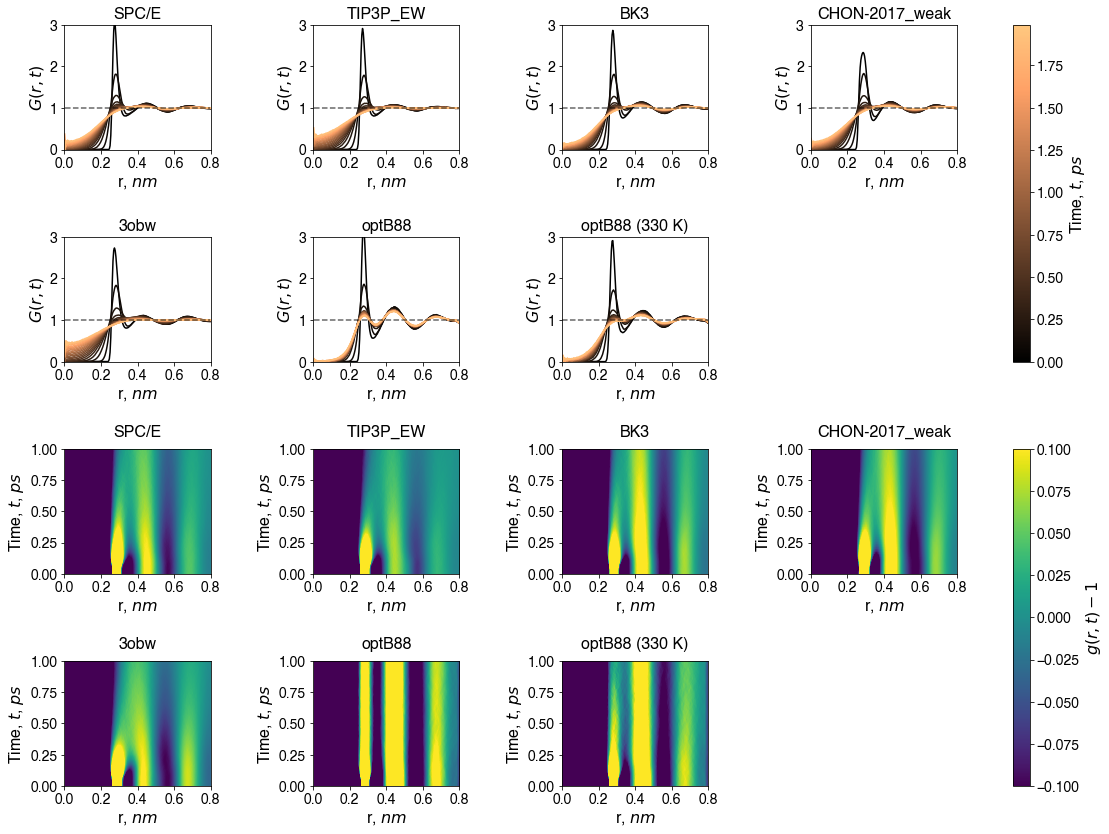

In [8]:
# Load in oxygen-oxygen partial data

oo = plot_partials.get_data("O_O")
plot_partials.plot_vhf_subplots(oo)

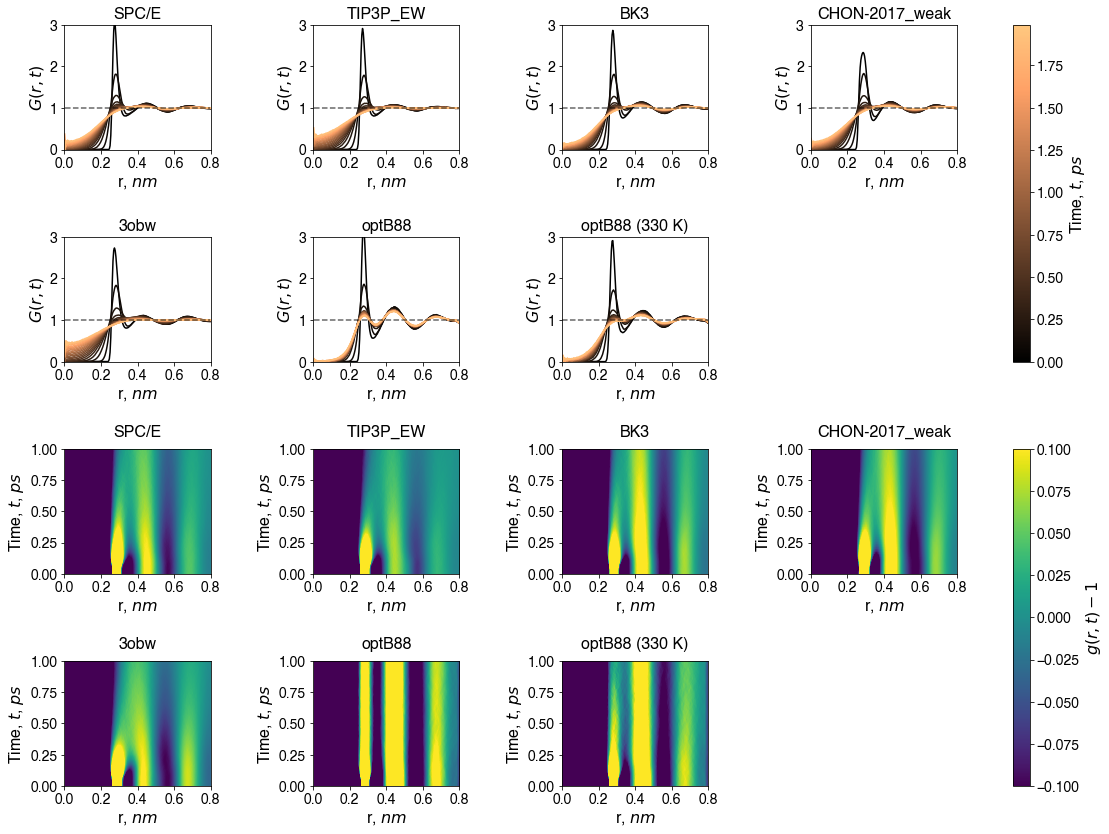

In [9]:
# Load in oxygen-hydrogen partial data

oh = plot_partials.get_data("O_H")
plot_partials.plot_vhf_subplots(oo)

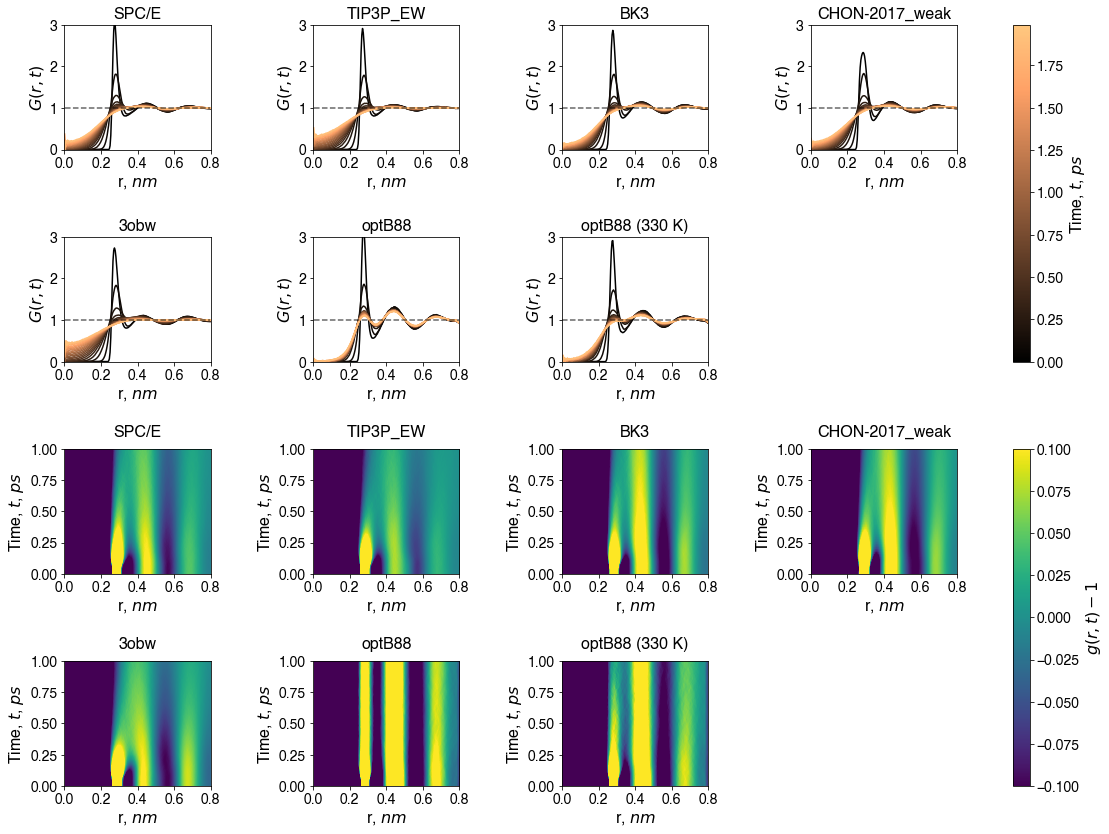

In [10]:
# Load in hydrogen-hydrogen partial data

hh = plot_partials.get_data("H_H")
plot_partials.plot_vhf_subplots(oo)

The height of the partial peaks have also been plotted.

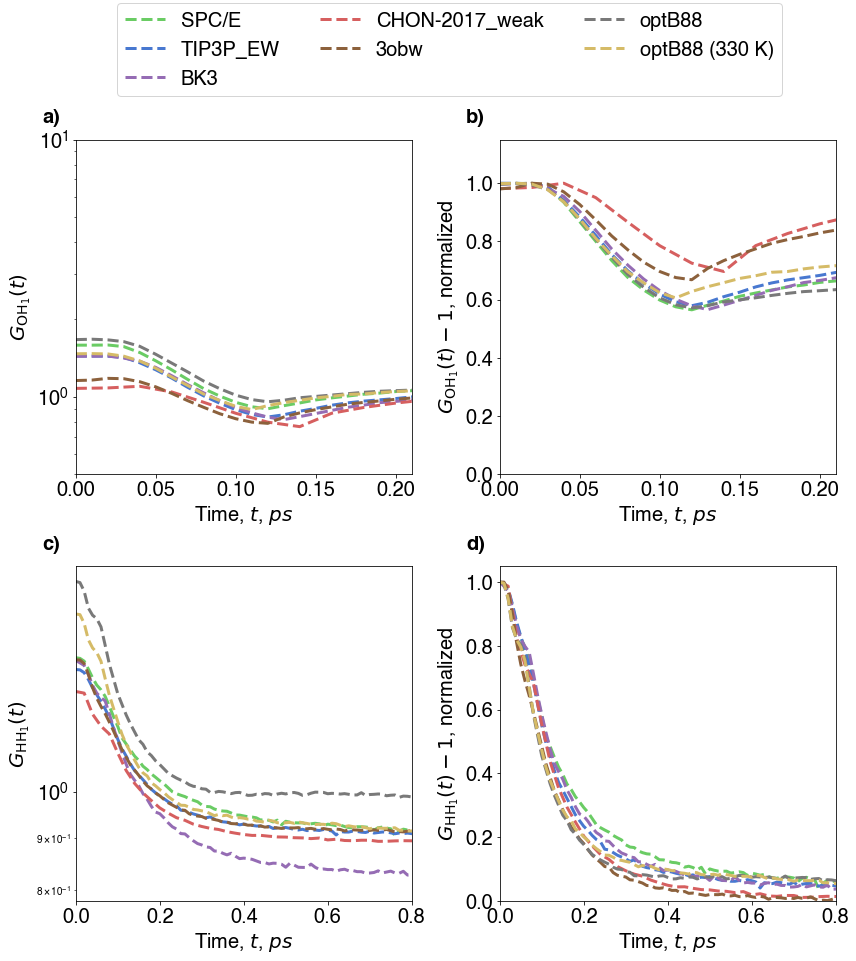

In [11]:
# Plot correlations for partial van hove functions

plot_partials.plot_peak_subplots(save=False)